# 모듈 가져오기 (IMPORT 단계)

In [1]:
# 데이터 구성: Series, DataFrame
import pandas as pd
import numpy as np


#탐색적 분석을 위한 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale,minmax_scale,robust_scale
from scipy.stats import shapiro


from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

#ARIMA
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import accuracy_score #평가함수
from sklearn.preprocessing import StandardScaler #SCALING

#matplotlib 이용한 background 그래프 실행 및 결과 확인 
%matplotlib inline


#export_graphviz: 나무구조 생성 및 저장
from sklearn.tree import export_graphviz
#graphviz: 나무 구조 시각화(.dot 확장자 파일 불러오기 등)
import graphviz


# 데이터 분할: train,test
from sklearn.model_selection import train_test_split

#데이터 scaling => 거리기반 알고리즘은 필수!!!
from statsmodels.api import Logit #로지스틱 회귀FL
from sklearn.preprocessing import StandardScaler
# 데이터 분할: train,test
from sklearn.model_selection import train_test_split
# 분류 DT
from sklearn.tree import DecisionTreeClassifier
#분류  RF
from sklearn.ensemble import RandomForestClassifier
# 분류 GB
from sklearn.ensemble import GradientBoostingClassifier
# 분류 SVM
from sklearn.svm import SVC
# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier
# 분류 NN
from sklearn.neural_network import MLPClassifier

# 최적모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 모델 성능 평가 
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


In [2]:
# 한글 폰트 적용
font_path = '/usr/share/fonts/opentype/noto/NotoSerifCJK-ExtraLight.ttc'
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family = font_name)

In [3]:
#결과 창 확대 (결과값 ...을 넓히고 싶으면 활성화해서 실행하시오)
pd.set_option('display.max_rows', 100000000000) # 최대 줄 수 설정
pd.set_option('display.max_columns', 100000000000) # 최대 열 수 설정 
pd.set_option('display.width', 1000) # 표시할 가로의 길이


## 데이터 받아오기

In [12]:
# 데이터 구성하기(MFG_MACHINE)
MFG_MACHINE = pd.read_csv("/home/pirl/빅데이터 프로젝트/cleansing/outlier/MFG_MACHINE_NULL_COL_OUT.csv", engine="python", encoding='EUC-KR')
#MFG_MACHINE = MFG_MACHINE.drop(MFG_MACHINE.columns[0], axis=1)

In [11]:
# 데이터 구성하기(MFG_PROCESS)
MFG_PROCESS = pd.read_csv("/home/pirl/빅데이터 프로젝트/cleansing/outlier/MFG_PROCESS_NULL_COL_OUT.csv", engine="python", encoding='EUC-KR')
#MFG_PROCESS = MFG_PROCESS.drop(MFG_PROCESS.columns[0], axis=1)

In [13]:
# 데이터 구성하기(MFG_TAT)
MFG_TAT = pd.read_csv("/home/pirl/빅데이터 프로젝트/cleansing/outlier/MFG_TAT_NULL_COL_OUT.csv", engine="python",encoding='EUC-KR')
#MFG_TAT = MFG_TAT.drop(MFG_TAT.columns[0], axis=1)

In [25]:
MFG_PROCESS.head()

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,TIME_8AGING,BLACK_RTD_TEMP_GLASS_START,BLACK_RTD_TEMP_GLASS_END,BLACK_RTD_TEMP_WALL_START,BLACK_RTD_TEMP_WALL_MAX,BLACK_RTD_PRES_START,BLACK_RTD_PRES_END,BLACK_RTD_TEMP_GLASS_OUT,BLACK_RTD_TEMP_HOOD_START,BLACK_RTD_TEMP_HOOD_MAX,AG_RTD_TEMP_GLASS_START,AG_RTD_TEMP_GLASS_END,AG_RTD_TEMP_WALL_START,AG_RTD_TEMP_WALL_MAX,AG_RTD_PRES_START,AG_RTD_PRES_END,AG_RTD_TEMP_GLASS_OUT,AG_RTD_TEMP_HOOD_START,AG_RTD_TEMP_HOOD_MAX,AG_EXPOSURE_TEMP_MASK,BUS_DEVELOP_TEMP_OVEN1,BUS_DEVELOP_TEMP_OVEN2,BUS_DEVELOP_TEMP_OVEN3,BUS_DEVELOP_TEMP_TANK1,BUS_DEVELOP_TEMP_TANK2,BUS_DEVELOP_TEMP_TANK3,BUS_DEVELOP_PRES2,BUS_DEVELOP_PRES3,BUS_FIRE_TEMP_KEEP_CH01,BUS_FIRE_TEMP_KEEP_CH02,BUS_FIRE_TEMP_KEEP_CH03,BUS_FIRE_TEMP_ANEAL_CH01,BUS_FIRE_TEMP_ANEAL_CH02,BUS_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_TEMP_KEEP_CH01,DIELEC_FIRE_TEMP_ANEAL_CH01,DIELEC_FIRE_TEMP_ANEAL_CH02,DIELEC_FIRE_TEMP_ANEAL_CH03,DIELEC_FIRE_EXHAUST_HEAT1,DIELEC_FIRE_EXHAUST_HEAT2,DIELEC_FIRE_EXHAUST_HEAT3,DIELEC_FIRE_EXHAUST_HEAT4,DIELEC_FIRE_EXHAUST_HEAT5,DIELEC_FIRE_EXHAUST_HEAT6,DIELEC_FIRE_EXHAUST_HEAT7,PHOS_R_DRY_TEMP_GLASS_START,PHOS_R_DRY_TEMP_GLASS_END,PHOS_R_DRY_TEMP_WALL_START,PHOS_R_DRY_TEMP_WALL_MAX,PHOS_R_DRY_PRES_START,PHOS_R_DRY_PRES_END,PHOS_R_DRY_TEMP_GLASS_OUT,PHOS_R_DRY_TEMP_HOOD_START,PHOS_R_DRY_TEMP_HOOD_MAX,PHOS_G_DRY_TEMP_GLASS_START,PHOS_G_DRY_TEMP_GLASS_END,PHOS_G_DRY_TEMP_WALL_START,PHOS_G_DRY_TEMP_WALL_MAX,PHOS_G_DRY_PRES_START,PHOS_G_DRY_PRES_END,PHOS_G_DRY_TEMP_GLASS_OUT,PHOS_G_DRY_TEMP_HOOD_START,PHOS_G_DRY_TEMP_HOOD_MAX,PHOS_FIRE_TEMP_ANEAL_CH01,PHOS_FIRE_TEMP_ANEAL_CH02,PHOS_FIRE_TEMP_ANEAL_CH03,PHOS_FIRE_TEMP_ANEAL_CH04,PHOS_FIRE_EXHAUST_HEAT1,PHOS_FIRE_EXHAUST_HEAT2,PHOS_FIRE_EXHAUST_HEAT3,PHOS_FIRE_EXHAUST_HEAT4
0,0,LOT-101,PNL-01,2019-04-01T00:01,2019-04-01T05:21,2019-04-01T11:01,2019-04-06T13:41,2019-04-11T03:41,2019-04-03T20:20,2019-04-11T12:41,2019-04-11T14:21,44.3,102.3,88.8,114.8,229.5,156.5,58.9,93.2,96.0,46.0,138.0,76.0,102.0,321.0,434.0,41.3,92.0,93.0,23.660,60.253,61.796,60.542,23.496,30.753,34.305,2.030,2.052,567,583,599,572,538,519,569,570,552,534,2017,2200,3168,3639.0,3283,3148,3215,48.0,136.0,110.5,167.8,86.6,70.9,28.3,126.0,157.30,47.2,139.2,111.0,189.4,55.9,28.2,32.4,82.8,84.0,443,419,392,372,4115.0,3973.0,4432,2506.0
1,0,LOT-101,PNL-02,2019-04-01T00:45,2019-04-01T06:05,2019-04-01T11:45,2019-04-06T14:25,2019-04-11T04:25,2019-04-03T21:04,2019-04-11T13:25,2019-04-11T15:05,44.6,101.6,88.7,114.3,216.9,155.9,59.0,93.9,96.0,46.0,139.0,77.9,101.0,398.8,339.8,45.6,93.0,93.0,23.340,61.528,60.228,63.139,23.420,30.800,35.300,2.032,2.010,569,584,600,574,541,520,573,575,558,536,2166,2132,2290,3331.0,3971,3030,2960,47.5,136.0,111.9,167.2,84.5,71.8,26.7,131.0,155.70,46.5,138.8,106.0,186.3,59.8,28.1,32.9,80.3,81.8,445,423,395,374,3642.0,4097.0,4499,2573.0
2,0,LOT-101,PNL-03,2019-04-01T01:29,2019-04-01T06:49,2019-04-01T12:29,2019-04-06T15:09,2019-04-11T05:09,2019-04-03T21:48,2019-04-11T14:09,2019-04-11T15:49,45.0,114.3,90.3,115.0,217.4,140.6,58.7,94.0,95.7,45.0,138.0,77.0,102.0,358.0,347.0,43.6,93.0,94.0,23.600,61.415,63.796,63.500,23.139,30.694,33.015,2.033,2.061,573,584,600,575,536,519,568,570,553,535,1984,2178,3194,3484.0,3324,3182,3123,47.3,136.0,110.6,168.5,85.4,73.6,27.5,131.0,156.30,46.9,139.0,108.4,187.9,48.5,30.3,29.4,81.2,82.2,444,421,393,372,4063.0,3972.0,4460,2502.0
3,0,LOT-101,PNL-04,2019-04-01T02:13,2019-04-01T07:33,2019-04-01T13:13,2019-04-06T15:53,2019-04-11T05:53,2019-04-03T22:32,2019-04-11T14:53,2019-04-11T16:33,44.0,115.0,88.6,115.4,242.5,152.4,58.8,94.0,97.0,46.1,138.0,77.8,101.1,356.4,438.1,45.1,93.0,93.0,23.424,61.446,60.800,64.220,23.376,30.691,32.760,2.030,2.062,561,578,594,574,539,519,569,571,551,533,2024,2220,3230,3574.0,3306,3338,3168,45.8,135.8,107.8,166.5,87.9,74.5,26.5,118.0,150.34,46.2,140.2,112.6,190.7,55.1,32.1,34.7,83.0,84.0,444,420,393,372,4131.0,4011.0,4466,2522.0
4,0,LOT-101,PNL-05,2019-04-01T02:58,2019-04-01T08:18,2019-04-01T1

In [15]:
MFG_MACHINE['JUDGE'] = MFG_MACHINE['JUDGE'].map({'양품':0,'명점':1})

In [16]:
MFG_PROCESS['JUDGE'] = MFG_PROCESS['JUDGE'].map({'양품':0,'명점':1})

In [17]:
MFG_TAT['JUDGE'] = MFG_TAT['JUDGE'].map({'양품':0,'명점':1})

# 로지스틱 회귀 (노스케일) - MFG_PROCESS

In [18]:
df_train, df_test = train_test_split(MFG_PROCESS, test_size = 0.3, random_state = 1234)
print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (2787, 81)
test data size: (1195, 81)


In [19]:
log_model = Logit.from_formula(""'JUDGE~BLACK_RTD_TEMP_GLASS_START+BLACK_RTD_TEMP_GLASS_END+ \
                               BLACK_RTD_TEMP_WALL_START+BLACK_RTD_TEMP_WALL_MAX+BLACK_RTD_PRES_START+ \
                               BLACK_RTD_PRES_END+BLACK_RTD_TEMP_GLASS_OUT+BLACK_RTD_TEMP_HOOD_START+ \
                               BLACK_RTD_TEMP_HOOD_MAX+AG_RTD_TEMP_GLASS_START+AG_RTD_TEMP_GLASS_END+ \
                               AG_RTD_TEMP_WALL_START+AG_RTD_TEMP_WALL_MAX+AG_RTD_PRES_START+AG_RTD_PRES_END+\
                               AG_RTD_TEMP_GLASS_OUT+AG_RTD_TEMP_HOOD_START+AG_RTD_TEMP_HOOD_MAX+\
                               AG_EXPOSURE_TEMP_MASK+BUS_DEVELOP_TEMP_OVEN1+BUS_DEVELOP_TEMP_OVEN2+\
                               BUS_DEVELOP_TEMP_OVEN3+BUS_DEVELOP_TEMP_TANK1+ BUS_DEVELOP_TEMP_TANK2+\
                               BUS_DEVELOP_TEMP_TANK3 +BUS_DEVELOP_PRES2+BUS_DEVELOP_PRES3+\
                               BUS_FIRE_TEMP_KEEP_CH01+BUS_FIRE_TEMP_KEEP_CH02+BUS_FIRE_TEMP_KEEP_CH03+\
                               BUS_FIRE_TEMP_ANEAL_CH01+BUS_FIRE_TEMP_ANEAL_CH02+	BUS_FIRE_TEMP_ANEAL_CH03+\
                               DIELEC_FIRE_TEMP_KEEP_CH01+DIELEC_FIRE_TEMP_ANEAL_CH01+DIELEC_FIRE_TEMP_ANEAL_CH02+\
                               DIELEC_FIRE_TEMP_ANEAL_CH03+DIELEC_FIRE_EXHAUST_HEAT1+DIELEC_FIRE_EXHAUST_HEAT2+\
                               DIELEC_FIRE_EXHAUST_HEAT3+DIELEC_FIRE_EXHAUST_HEAT4+DIELEC_FIRE_EXHAUST_HEAT5+\
                               DIELEC_FIRE_EXHAUST_HEAT6+DIELEC_FIRE_EXHAUST_HEAT7+PHOS_R_DRY_TEMP_GLASS_START+\
                               PHOS_R_DRY_TEMP_GLASS_END+PHOS_R_DRY_TEMP_WALL_START+PHOS_R_DRY_TEMP_WALL_MAX+\
                               PHOS_R_DRY_PRES_START+PHOS_R_DRY_PRES_END+PHOS_R_DRY_TEMP_GLASS_OUT+\
                               PHOS_R_DRY_TEMP_HOOD_START+PHOS_R_DRY_TEMP_HOOD_MAX+PHOS_G_DRY_TEMP_GLASS_START+\
                               PHOS_G_DRY_TEMP_GLASS_END+PHOS_G_DRY_TEMP_WALL_START+PHOS_G_DRY_TEMP_WALL_MAX+\
                               PHOS_G_DRY_PRES_START+PHOS_G_DRY_PRES_END+PHOS_G_DRY_TEMP_GLASS_OUT+\
                               PHOS_G_DRY_TEMP_HOOD_START+PHOS_G_DRY_TEMP_HOOD_MAX+\
                               PHOS_FIRE_TEMP_ANEAL_CH01+PHOS_FIRE_TEMP_ANEAL_CH02+PHOS_FIRE_TEMP_ANEAL_CH03+\
                               PHOS_FIRE_TEMP_ANEAL_CH04+PHOS_FIRE_EXHAUST_HEAT1+PHOS_FIRE_EXHAUST_HEAT2+\
                               PHOS_FIRE_EXHAUST_HEAT3+PHOS_FIRE_EXHAUST_HEAT4'"", df_train)
#BUS_DEVELOP_PRES1 제거함 (데이터 값이 전원 0이라서 P값 std err 값 nan 뜸
log_result = log_model.fit(method='bfgs')
print(log_result.summary())

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.159787
         Iterations: 35
         Function evaluations: 50
         Gradient evaluations: 41
                           Logit Regression Results                           
Dep. Variable:                  JUDGE   No. Observations:                 2787
Model:                          Logit   Df Residuals:                     2716
Method:                           MLE   Df Model:                           70
Date:                Fri, 21 Feb 2020   Pseudo R-squ.:                  0.5423
Time:                        17:02:55   Log-Likelihood:                -445.33
converged:                      False   LL-Null:                       -972.89
Covariance Type:            nonrobust   LLR p-value:                9.977e-176
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.0005    

In [20]:
y_pred = log_result.predict(df_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

79      0
3760    0
3406    0
2955    0
1081    0
dtype: int64

In [21]:
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["JUDGE"],y_pred_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test["JUDGE"],y_pred_class)))

Accuracy: 0.946

Confusion Matrix:
[[1065   19]
 [  45   66]]


In [22]:
df_logistic_coef=pd.DataFrame({"Coef":log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.sort_values("Coef", ascending = False)

,Coef
AG_RTD_TEMP_GLASS_OUT,1.251388
BUS_DEVELOP_TEMP_TANK2,0.452777
AG_RTD_TEMP_WALL_START,0.330104
BLACK_RTD_TEMP_HOOD_MAX,0.283992
BUS_DEVELOP_TEMP_OVEN1,0.224291
BLACK_RTD_TEMP_WALL_MAX,0.194519
AG_RTD_TEMP_GLASS_START,0.180344
PHOS_G_DRY_TEMP_WALL_MAX,0.131033
PHOS_FIRE_TEMP_ANEAL_CH02,0.130863
BUS_FIRE_TEMP_ANEAL_CH01,0.104515


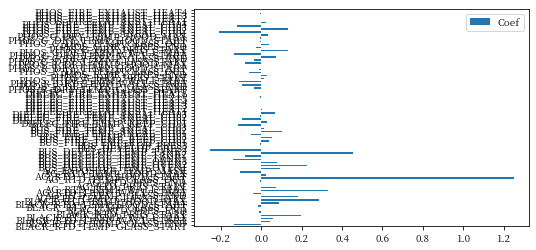

In [23]:
df_logistic_coef.plot.barh(y="Coef")

In [26]:
# RFE(recursive feature elimination) 함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적 제거
# 목표 변수 분리
df_y = MFG_PROCESS['JUDGE']
df_x = MFG_PROCESS.drop(['JUDGE',"LOT_ID","PANEL_ID",'TIME_1BLACK',"TIME_2AG","TIME_3BUS","TIME_4DIELEC","TIME_5MGO","TIME_6PHOS","TIME_7PASTE","TIME_8AGING"], axis=1, inplace=False)
#df_x = MFG_PROCESS.drop(['JUDGE'], axis=1, inplace=False)
df5_dummy_x = pd.get_dummies(df_x)
df_x = df5_dummy_x
model = LinearRegression()

# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택


In [27]:
df_x.shape

(3982, 70)

In [28]:
MFG_TAT.isnull().sum()

JUDGE                      0
LOT_ID                     0
PANEL_ID                   0
TIME_1BLACK                0
TIME_2AG                   0
TIME_3BUS                  0
TIME_4DIELEC               0
TIME_5MGO                  0
TIME_6PHOS                 0
TIME_7PASTE                0
TIME_8AGING                0
TAT_1BLACK_1PRINT          0
TAT_1BLACK_2RTD            0
TAT_2AG_1PRINT             0
TAT_2AG_2RTD               0
TAT_2AG_3EXPOSURE          0
TAT_3BUS_1DEVELOP          0
TAT_3BUS_2FIRE             0
TAT_4DIELEC_FIRE           0
TAT_5MGO                   0
TAT_6PHOS_1R_1DISPENSER    0
TAT_6PHOS_1R_2DRY          0
TAT_6PHOS_2G_1DISPENSER    0
TAT_6PHOS_2G_2DRY          0
TAT_6PHOS_3B_1DISPENSER    0
TAT_6PHOS_4FIRE            0
TAT_8AGING                 0
dtype: int64

In [29]:
#결측치 전원 제거
df_x.isnull().sum()

BLACK_RTD_TEMP_GLASS_START     0
BLACK_RTD_TEMP_GLASS_END       0
BLACK_RTD_TEMP_WALL_START      0
BLACK_RTD_TEMP_WALL_MAX        0
BLACK_RTD_PRES_START           0
BLACK_RTD_PRES_END             0
BLACK_RTD_TEMP_GLASS_OUT       0
BLACK_RTD_TEMP_HOOD_START      0
BLACK_RTD_TEMP_HOOD_MAX        0
AG_RTD_TEMP_GLASS_START        0
AG_RTD_TEMP_GLASS_END          0
AG_RTD_TEMP_WALL_START         0
AG_RTD_TEMP_WALL_MAX           0
AG_RTD_PRES_START              0
AG_RTD_PRES_END                0
AG_RTD_TEMP_GLASS_OUT          0
AG_RTD_TEMP_HOOD_START         0
AG_RTD_TEMP_HOOD_MAX           0
AG_EXPOSURE_TEMP_MASK          0
BUS_DEVELOP_TEMP_OVEN1         0
BUS_DEVELOP_TEMP_OVEN2         0
BUS_DEVELOP_TEMP_OVEN3         0
BUS_DEVELOP_TEMP_TANK1         0
BUS_DEVELOP_TEMP_TANK2         0
BUS_DEVELOP_TEMP_TANK3         0
BUS_DEVELOP_PRES2              0
BUS_DEVELOP_PRES3              0
BUS_FIRE_TEMP_KEEP_CH01        0
BUS_FIRE_TEMP_KEEP_CH02        0
BUS_FIRE_TEMP_KEEP_CH03        0
BUS_FIRE_T

In [30]:
#로지스틱 회귀 모델 불러옴

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#rfe = RFE(model, 8)
#fit = rfe.fit(X, y)
rfe = RFE(estimator = model, n_features_to_select = 7).fit(df_x, df_y)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

In [31]:
selected_cols = df_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_x.columns[~rfe.support_]
print('Selected Variables: {}'.format(selected_cols))
print("\n\n\n\n")
print('Removed Variables: {}'.format(removed_cols))

Selected Variables: Index(['AG_RTD_TEMP_GLASS_OUT', 'AG_EXPOSURE_TEMP_MASK', 'BUS_DEVELOP_TEMP_TANK1', 'BUS_DEVELOP_TEMP_TANK2', 'PHOS_R_DRY_TEMP_GLASS_END', 'PHOS_G_DRY_TEMP_HOOD_START', 'PHOS_G_DRY_TEMP_HOOD_MAX'], dtype='object')





Removed Variables: Index(['BLACK_RTD_TEMP_GLASS_START', 'BLACK_RTD_TEMP_GLASS_END', 'BLACK_RTD_TEMP_WALL_START', 'BLACK_RTD_TEMP_WALL_MAX', 'BLACK_RTD_PRES_START', 'BLACK_RTD_PRES_END', 'BLACK_RTD_TEMP_GLASS_OUT', 'BLACK_RTD_TEMP_HOOD_START', 'BLACK_RTD_TEMP_HOOD_MAX', 'AG_RTD_TEMP_GLASS_START', 'AG_RTD_TEMP_GLASS_END', 'AG_RTD_TEMP_WALL_START', 'AG_RTD_TEMP_WALL_MAX', 'AG_RTD_PRES_START', 'AG_RTD_PRES_END', 'AG_RTD_TEMP_HOOD_START', 'AG_RTD_TEMP_HOOD_MAX', 'BUS_DEVELOP_TEMP_OVEN1', 'BUS_DEVELOP_TEMP_OVEN2', 'BUS_DEVELOP_TEMP_OVEN3', 'BUS_DEVELOP_TEMP_TANK3', 'BUS_DEVELOP_PRES2', 'BUS_DEVELOP_PRES3', 'BUS_FIRE_TEMP_KEEP_CH01', 'BUS_FIRE_TEMP_KEEP_CH02', 'BUS_FIRE_TEMP_KEEP_CH03', 'BUS_FIRE_TEMP_ANEAL_CH01', 'BUS_FIRE_TEMP_ANEAL_CH02', 'BUS_FIRE_TEMP_AN

In [32]:
df_x_rfe = df_x[selected_cols]
df_x_rfe_const = add_constant(df_x_rfe)
df_rfe_vif = pd.DataFrame()
df_rfe_vif['variable'] = df_x_rfe_const.columns
df_rfe_vif['VIF'] = [variance_inflation_factor(df_x_rfe_const.values, i) for i in range(df_x_rfe_const.shape[1])]
df_rfe_vif.sort_values('VIF', inplace=True)
df_rfe_vif.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,variable,VIF
1,AG_RTD_TEMP_GLASS_OUT,1.024
5,PHOS_R_DRY_TEMP_GLASS_END,1.045
2,AG_EXPOSURE_TEMP_MASK,1.149
4,BUS_DEVELOP_TEMP_TANK2,1.202
3,BUS_DEVELOP_TEMP_TANK1,1.252
6,PHOS_G_DRY_TEMP_HOOD_START,45.280
7,PHOS_G_DRY_TEMP_HOOD_MAX,45.380
0,const,214115.421


# 로지스틱 회귀 (스케일) - MFG_PROCESS

In [ ]:
df_char = MFG_PROCESS.select_dtypes(include = "object")
df_numeric = MFG_PROCESS.select_dtypes(exclude = "object")

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

df_scaled = pd.concat([df_numeric_scaled, df_char], axis = 1)
df_scaled.head()

In [ ]:
df_scaled["JUDGE"] = np.where(df_scaled["JUDGE"]>0,1,0)
df_scaled.head()

In [ ]:
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)

In [ ]:
scaled_log_model = Logit.from_formula(""'JUDGE~C(LOT_ID)+C(PANEL_ID)+BLACK_RTD_TEMP_GLASS_START+BLACK_RTD_TEMP_GLASS_END+BLACK_RTD_TEMP_WALL_START+BLACK_RTD_TEMP_WALL_MAX+BLACK_RTD_PRES_START+BLACK_RTD_PRES_END+BLACK_RTD_TEMP_GLASS_OUT+BLACK_RTD_TEMP_HOOD_START+BLACK_RTD_TEMP_HOOD_MAX+AG_RTD_TEMP_GLASS_START+AG_RTD_TEMP_GLASS_END+AG_RTD_TEMP_WALL_START+AG_RTD_TEMP_WALL_MAX+AG_RTD_PRES_START+AG_RTD_PRES_END+AG_RTD_TEMP_GLASS_OUT+AG_RTD_TEMP_HOOD_START+AG_RTD_TEMP_HOOD_MAX+AG_EXPOSURE_TEMP_MASK+BUS_DEVELOP_TEMP_OVEN1+BUS_DEVELOP_TEMP_OVEN2+BUS_DEVELOP_TEMP_OVEN3+BUS_DEVELOP_PH_TANK1+BUS_DEVELOP_TEMP_TANK1+BUS_DEVELOP_PH_TANK1_2+BUS_DEVELOP_TEMP_TANK2+BUS_DEVELOP_PH_TANK1_3+BUS_DEVELOP_TEMP_TANK3+BUS_DEVELOP_PRES1+BUS_DEVELOP_PRES2+BUS_DEVELOP_PRES3+BUS_FIRE_TEMP_HEAT1_CH01+BUS_FIRE_TEMP_HEAT1_CH02+BUS_FIRE_TEMP_HEAT1_CH03+BUS_FIRE_TEMP_HEAT2_CH01+BUS_FIRE_TEMP_HEAT2_CH02+BUS_FIRE_TEMP_HEAT2_CH03+BUS_FIRE_TEMP_KEEP_CH01+BUS_FIRE_TEMP_KEEP_CH02+BUS_FIRE_TEMP_KEEP_CH03+BUS_FIRE_TEMP_ANEAL_CH01+BUS_FIRE_TEMP_ANEAL_CH02+	BUS_FIRE_TEMP_ANEAL_CH03+DIELEC_FIRE_TEMP_HEAT1_CH01+DIELEC_FIRE_TEMP_HEAT1_CH02+DIELEC_FIRE_TEMP_HEAT1_CH03+DIELEC_FIRE_TEMP_HEAT2_CH01+DIELEC_FIRE_TEMP_HEAT2_CH02+DIELEC_FIRE_TEMP_HEAT2_CH03+DIELEC_FIRE_TEMP_KEEP_CH01+DIELEC_FIRE_TEMP_KEEP_CH02+DIELEC_FIRE_TEMP_KEEP_CH03+DIELEC_FIRE_TEMP_ANEAL_CH01+DIELEC_FIRE_TEMP_ANEAL_CH02+DIELEC_FIRE_TEMP_ANEAL_CH03+DIELEC_FIRE_EXHAUST_HEAT1+DIELEC_FIRE_EXHAUST_HEAT2+DIELEC_FIRE_EXHAUST_HEAT3+DIELEC_FIRE_EXHAUST_HEAT4+DIELEC_FIRE_EXHAUST_HEAT5+DIELEC_FIRE_EXHAUST_HEAT6+DIELEC_FIRE_EXHAUST_HEAT7+PHOS_R_DRY_TEMP_GLASS_START+PHOS_R_DRY_TEMP_GLASS_END+PHOS_R_DRY_TEMP_WALL_START+PHOS_R_DRY_TEMP_WALL_MAX+	PHOS_R_DRY_PRES_START+PHOS_R_DRY_PRES_END+PHOS_R_DRY_TEMP_GLASS_OUT+PHOS_R_DRY_TEMP_HOOD_START+PHOS_R_DRY_TEMP_HOOD_MAX+PHOS_G_DRY_TEMP_GLASS_START+PHOS_G_DRY_TEMP_GLASS_END+PHOS_G_DRY_TEMP_WALL_START+PHOS_G_DRY_TEMP_WALL_MAX+PHOS_G_DRY_PRES_START+PHOS_G_DRY_PRES_END+PHOS_G_DRY_TEMP_GLASS_OUT+PHOS_G_DRY_TEMP_HOOD_START+PHOS_G_DRY_TEMP_HOOD_MAX+PHOS_FIRE_TEMP_HEAT_CH01+PHOS_FIRE_TEMP_HEAT_CH02+PHOS_FIRE_TEMP_HEAT_CH03+PHOS_FIRE_TEMP_HEAT_CH04+PHOS_FIRE_TEMP_KEEP_CH01+	PHOS_FIRE_TEMP_KEEP_CH02+PHOS_FIRE_TEMP_KEEP_CH03+PHOS_FIRE_TEMP_KEEP_CH04+PHOS_FIRE_TEMP_ANEAL_CH01+PHOS_FIRE_TEMP_ANEAL_CH02+PHOS_FIRE_TEMP_ANEAL_CH03+PHOS_FIRE_TEMP_ANEAL_CH04+PHOS_FIRE_EXHAUST_HEAT1+PHOS_FIRE_EXHAUST_HEAT2+PHOS_FIRE_EXHAUST_HEAT3+PHOS_FIRE_EXHAUST_HEAT4'"", df_scaled_train)
scaled_log_result = scaled_log_model.fit(method='bfgs')
print(log_result.summary())

In [ ]:
df_log_scaled_coef = pd.DataFrame({"Coef":scaled_log_result.params.values[1:]}, index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.sort_values("Coef", ascending=False)

In [ ]:
df_log_scaled_coef.plot.barh(y="Coef",legend=False)

In [ ]:
model = LogisticRegression()
#rfe = RFE(model, 8)
#fit = rfe.fit(X, y)
rfe = RFE(estimator = model, n_features_to_select = 7).fit(df_x, df_y)

selected_cols = df_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_x.columns[~rfe.support_]
print('Selected Variables: {}'.format(selected_cols))
print("\n\n\n\n")
print('Removed Variables: {}'.format(removed_cols))

# 로지스틱 회귀 (노스케일) - MFG_MACHINE

In [51]:
df_train, df_test = train_test_split(MFG_MACHINE, test_size = 0.3, random_state = 1234)
print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (2787, 28)
test data size: (1195, 28)


In [52]:
log_model = Logit.from_formula(""'JUDGE~C(MC_1BLACK_1PRINT)+C(MC_1BLACK_2RTD)+C(MC_2AG_1PRINT)+C(MC_2AG_2RTD)+C(MC_2AG_3EXPOSURE)+C(MC_3BUS_1DEVELOP)+C(MC_3BUS_2FIRE)+C(MC_4DIELEC_1FIRE)+C(MC_5MGO)+C(MC_6PHOS_1R_1DISPENSER)+C(MC_6PHOS_1R_2DRY)+C(MC_6PHOS_2G_1DISPENSER)+C(MC_6PHOS_2G_2DRY)+C(MC_6PHOS_3B_1DISPENSER)+C(MC_6PHOS_4FIRE)+C(MC_8AGING)'"", df_train)
log_result = log_model.fit(method='bfgs')
print(log_result.summary())

         Current function value: 0.344848
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                           Logit Regression Results                           
Dep. Variable:                  JUDGE   No. Observations:                 2787
Model:                          Logit   Df Residuals:                     2768
Method:                           MLE   Df Model:                           18
Date:                Fri, 21 Feb 2020   Pseudo R-squ.:                 0.01212
Time:                        18:26:23   Log-Likelihood:                -961.09
converged:                      False   LL-Null:                       -972.89
Covariance Type:            nonrobust   LLR p-value:                    0.1689
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                       

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [53]:
y_pred = log_result.predict(df_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

79      0
3760    0
3406    0
2955    0
1081    0
dtype: int64

In [54]:
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["JUDGE"],y_pred_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test["JUDGE"],y_pred_class)))

Accuracy: 0.907

Confusion Matrix:
[[1084    0]
 [ 111    0]]


In [55]:
df_logistic_coef=pd.DataFrame({"Coef":log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.sort_values("Coef", ascending = False)

,Coef
C(MC_6PHOS_4FIRE)[T.3호기],0.333416
C(MC_6PHOS_4FIRE)[T.2호기],0.258157
C(MC_5MGO)[T.2호기],0.112367
C(MC_3BUS_2FIRE)[T.2호기],0.060929
C(MC_1BLACK_2RTD)[T.2호기],0.049913
C(MC_6PHOS_3B_1DISPENSER)[T.2호기],0.031469
C(MC_6PHOS_2G_2DRY)[T.2호기],0.019011
C(MC_2AG_1PRINT)[T.2호기],-0.005625
C(MC_4DIELEC_1FIRE)[T.2호기],-0.008649
C(MC_2AG_3EXPOSURE)[T.2호기],-0.047874


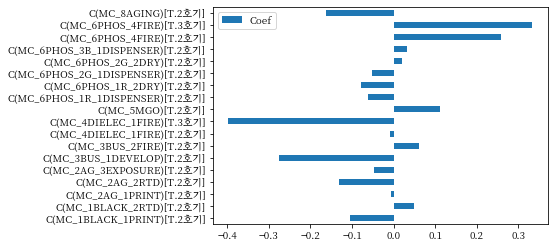

In [56]:
df_logistic_coef.plot.barh(y="Coef")

In [58]:
#로지스틱 회귀 모델 불러옴

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

df_y = MFG_MACHINE['JUDGE']
df_x = MFG_MACHINE.drop(['JUDGE',"LOT_ID","PANEL_ID",'TIME_1BLACK',"TIME_2AG","TIME_3BUS","TIME_4DIELEC","TIME_5MGO","TIME_6PHOS","TIME_7PASTE","TIME_8AGING"], axis=1, inplace=False)
df5_dummy_x = pd.get_dummies(df_x)
df_x = df5_dummy_x
model = LinearRegression()

# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택


model = LogisticRegression()
#rfe = RFE(model, 8)
#fit = rfe.fit(X, y)
rfe = RFE(estimator = model, n_features_to_select = 7).fit(df_x, df_y)

selected_cols = df_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_x.columns[~rfe.support_]
print('Selected Variables: {}'.format(selected_cols))
print("\n\n\n\n")
print('Removed Variables: {}'.format(removed_cols))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

Selected Variables: Index(['MC_2AG_1PRINT_1호기', 'MC_2AG_1PRINT_2호기', 'MC_2AG_3EXPOSURE_1호기', 'MC_2AG_3EXPOSURE_2호기', 'MC_4DIELEC_1FIRE_3호기', 'MC_8AGING_1호기', 'MC_8AGING_2호기'], dtype='object')





Removed Variables: Index(['MC_1BLACK_1PRINT_1호기', 'MC_1BLACK_1PRINT_2호기', 'MC_1BLACK_2RTD_1호기', 'MC_1BLACK_2RTD_2호기', 'MC_2AG_2RTD_1호기', 'MC_2AG_2RTD_2호기', 'MC_3BUS_1DEVELOP_1호기', 'MC_3BUS_1DEVELOP_2호기', 'MC_3BUS_2FIRE_1호기', 'MC_3BUS_2FIRE_2호기', 'MC_4DIELEC_1FIRE_1호기', 'MC_4DIELEC_1FIRE_2호기', 'MC_5MGO_1호기', 'MC_5MGO_2호기', 'MC_6PHOS_1R_1DISPENSER_1호기', 'MC_6PHOS_1R_1DISPENSER_2호기', 'MC_6PHOS_1R_2DRY_1호기', 'MC_6PHOS_1R_2DRY_2호기', 'MC_6PHOS_2G_1DISPENSER_1호기', 'MC_6PHOS_2G_1DISPENSER_2호기', 'MC_6PHOS_2G_2DRY_1호기', 'MC_6PHOS_2G_2DRY_2호기', 'MC_6PHOS_3B_1DISPENSER_1호기', 'MC_6PHOS_3B_1DISPENSER_2호기', 'MC_6PHOS_4FIRE_1호기', 'MC_6PHOS_4FIRE_2호기', 'MC_6PHOS_4FIRE_3호기', 'MC_7PASTE_1호기', 'MC_7PASTE_2호기'], dtype='object')


# 로지스틱 회귀 (스케일) - MFG_MACHINE

In [ ]:
df_char = MFG_MACHINE.select_dtypes(include = "object")
df_numeric = MFG_MACHINE.select_dtypes(exclude = "object")

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

df_scaled = pd.concat([df_numeric_scaled, df_char], axis = 1)
df_scaled.head()

In [ ]:
df_scaled["JUDGE"] = np.where(df_scaled["JUDGE"]>0,1,0)
df_scaled.head()

In [ ]:
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)

In [ ]:
scaled_log_model = Logit.from_formula(""'JUDGE~C(LOT_ID)+C(PANEL_ID)+C(MC_1BLACK_1PRINT)+C(MC_1BLACK_2RTD)+C(MC_2AG_1PRINT)+C(MC_2AG_2RTD)+C(MC_2AG_3EXPOSURE)+C(MC_3BUS_1DEVELOP)+C(MC_3BUS_2FIRE)+C(MC_4DIELEC_1FIRE)+C(MC_5MGO)+C(MC_6PHOS_1R_1DISPENSER)+C(MC_6PHOS_1R_2DRY)+C(MC_6PHOS_2G_1DISPENSER)+C(MC_6PHOS_2G_2DRY)+C(MC_6PHOS_3B_1DISPENSER)+C(MC_6PHOS_4FIRE)+C(MC_7PASTE)+C(MC_8AGING)'"", df_scaled_train)
scaled_log_result = scaled_log_model.fit(method='bfgs')
print(scaled_log_result.summary())

In [ ]:
df_log_scaled_coef = pd.DataFrame({"Coef":scaled_log_result.params.values[1:]}, index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.sort_values("Coef", ascending=False)

In [ ]:
df_log_scaled_coef.plot.barh(y="Coef",legend=False)

# 로지스틱 회귀 (노스케일) - MFG_TAT

In [65]:
df_train, df_test = train_test_split(MFG_TAT, test_size = 0.3, random_state = 1234)
print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (2787, 27)
test data size: (1195, 27)


In [69]:
log_model = Logit.from_formula(""'JUDGE~TAT_1BLACK_1PRINT+TAT_1BLACK_2RTD+TAT_2AG_1PRINT+TAT_2AG_2RTD+TAT_2AG_3EXPOSURE+TAT_3BUS_1DEVELOP+TAT_3BUS_2FIRE+TAT_4DIELEC_FIRE+	TAT_5MGO+TAT_6PHOS_1R_1DISPENSER+TAT_6PHOS_1R_2DRY+TAT_6PHOS_2G_1DISPENSER+TAT_6PHOS_2G_2DRY+TAT_6PHOS_3B_1DISPENSER+TAT_6PHOS_4FIRE+TAT_8AGING'"", df_train)
log_result = log_model.fit(method='bfgs')
print(log_result.summary())

         Current function value: 0.337393
         Iterations: 35
         Function evaluations: 55
         Gradient evaluations: 45
                           Logit Regression Results                           
Dep. Variable:                  JUDGE   No. Observations:                 2787
Model:                          Logit   Df Residuals:                     2770
Method:                           MLE   Df Model:                           16
Date:                Fri, 21 Feb 2020   Pseudo R-squ.:                 0.03348
Time:                        18:34:06   Log-Likelihood:                -940.31
converged:                      False   LL-Null:                       -972.89
Covariance Type:            nonrobust   LLR p-value:                 6.951e-08
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.0198      5.880     

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [70]:
y_pred = log_result.predict(df_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

79      0
3760    0
3406    0
2955    0
1081    0
dtype: int64

In [71]:
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["JUDGE"],y_pred_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test["JUDGE"],y_pred_class)))

Accuracy: 0.904

Confusion Matrix:
[[1080    4]
 [ 111    0]]


In [72]:
df_logistic_coef=pd.DataFrame({"Coef":log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.sort_values("Coef", ascending = False)

,Coef
TAT_2AG_1PRINT,0.018239
TAT_6PHOS_1R_1DISPENSER,0.012770
TAT_6PHOS_2G_1DISPENSER,0.010655
TAT_1BLACK_2RTD,0.004363
TAT_5MGO,0.001696
TAT_4DIELEC_FIRE,0.000802
TAT_6PHOS_1R_2DRY,0.000600
TAT_3BUS_2FIRE,0.000300
TAT_8AGING,0.000234
TAT_2AG_3EXPOSURE,0.000002


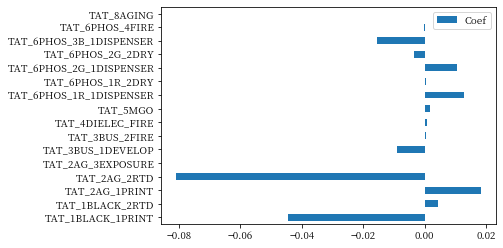

In [73]:
df_logistic_coef.plot.barh(y="Coef")

In [75]:
#로지스틱 회귀 모델 불러옴

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

df_y = MFG_TAT['JUDGE']
df_x = MFG_TAT.drop(['JUDGE',"LOT_ID","PANEL_ID",'TIME_1BLACK',"TIME_2AG","TIME_3BUS","TIME_4DIELEC","TIME_5MGO","TIME_6PHOS","TIME_7PASTE","TIME_8AGING"], axis=1, inplace=False)
df5_dummy_x = pd.get_dummies(df_x)
df_x = df5_dummy_x
model = LinearRegression()

# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택


model = LogisticRegression()
#rfe = RFE(model, 8)
#fit = rfe.fit(X, y)
rfe = RFE(estimator = model, n_features_to_select = 7).fit(df_x, df_y)

selected_cols = df_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_x.columns[~rfe.support_]
print('Selected Variables: {}'.format(selected_cols))
print("\n\n\n\n")
print('Removed Variables: {}'.format(removed_cols))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

Selected Variables: Index(['TAT_1BLACK_1PRINT', 'TAT_1BLACK_2RTD', 'TAT_2AG_1PRINT', 'TAT_2AG_2RTD', 'TAT_6PHOS_1R_1DISPENSER', 'TAT_6PHOS_2G_1DISPENSER', 'TAT_6PHOS_3B_1DISPENSER'], dtype='object')





Removed Variables: Index(['TAT_2AG_3EXPOSURE', 'TAT_3BUS_1DEVELOP', 'TAT_3BUS_2FIRE', 'TAT_4DIELEC_FIRE', 'TAT_5MGO', 'TAT_6PHOS_1R_2DRY', 'TAT_6PHOS_2G_2DRY', 'TAT_6PHOS_4FIRE', 'TAT_8AGING'], dtype='object')


# 로지스틱 회귀 (스케일) - MFG_TAT

In [76]:
df_char = MFG_TAT.select_dtypes(include = "object")
df_numeric = MFG_TAT.select_dtypes(exclude = "object")

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

df_scaled = pd.concat([df_numeric_scaled, df_char], axis = 1)
df_scaled.head()

,JUDGE,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_8AGING,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,TIME_8AGING
0,-0.343839,-0.358710,0.060533,-0.482179,1.383380,-0.045205,2.131141,-0.278283,-0.354720,-0.187419,-0.412348,-1.125244,0.697344,0.614616,0.221579,0.054153,0.592080,LOT-101,PNL-01,2019-04-01T00:01,2019-04-01T05:21,2019-04-01T11:01,2019-04-06T13:41,2019-04-11T03:41,2019-04-03T20:20,2019-04-11T12:41,2019-04-11T14:21
1,-0.343839,-0.358710,-0.709567,-0.167883,0.177817,-0.276339,0.049798,-1.082613,0.403271,-0.187419,-0.012891,0.533212,0.113078,0.118186,0.009124,-0.386878,0.598211,LOT-101,PNL-02,2019-04-01T00:45,2019-04-01T06:05,2019-04-01T11:45,2019-04-06T14:25,2019-04-11T04:25,2019-04-03T21:04,2019-04-11T13:25,2019-04-11T15:05
2,-0.343839,-2.058406,0.060533,-2.053662,-0.625892,-0.322565,-0.139415,-0.872788,0.388409,-0.187419,-0.012891,0.248905,1.086855,0.614616,0.221579,-0.664920,4.092815,LOT-101,PNL-03,2019-04-01T01:29,2019-04-01T06:49,2019-04-01T12:29,2019-04-06T15:09,2019-04-11T05:09,2019-04-03T21:48,2019-04-11T14:09,2019-04-11T15:49
3,-0.343839,-0.358710,-0.709567,-0.167883,-0.625892,0.370835,2.131141,0.642617,-0.488483,-0.187419,-0.212620,0.391058,-0.276434,0.713902,0.646490,-0.952550,0.604342,LOT-101,PNL-04,2019-04-01T02:13,2019-04-01T07:33,2019-04-01T13:13,2019-04-06T15:53,2019-04-11T05:53,2019-04-03T22:32,2019-04-11T14:53,2019-04-11T16:33
4,-0.343839,-0.358710,-0.709567,-0.167883,-0.625892,-0.692379,0.428224,2.158022,-0.324995,0.313455,-0.412348,-0.651399,0.113078,0.515330,0.009124,-0.017754,0.592080,LOT-101,PNL-05,2019-04-01T02:58,2019-04-01T08:18,2019-04-01T13:58,2019-04-06T16:38,2019-04-11T06:38,2019-04-03T23:17,2019-04-11T15:38,2019-04-11T17:18


In [77]:
df_scaled["JUDGE"] = np.where(df_scaled["JUDGE"]>0,1,0)
df_scaled.head()

,JUDGE,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_8AGING,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,TIME_8AGING
0,0,-0.358710,0.060533,-0.482179,1.383380,-0.045205,2.131141,-0.278283,-0.354720,-0.187419,-0.412348,-1.125244,0.697344,0.614616,0.221579,0.054153,0.592080,LOT-101,PNL-01,2019-04-01T00:01,2019-04-01T05:21,2019-04-01T11:01,2019-04-06T13:41,2019-04-11T03:41,2019-04-03T20:20,2019-04-11T12:41,2019-04-11T14:21
1,0,-0.358710,-0.709567,-0.167883,0.177817,-0.276339,0.049798,-1.082613,0.403271,-0.187419,-0.012891,0.533212,0.113078,0.118186,0.009124,-0.386878,0.598211,LOT-101,PNL-02,2019-04-01T00:45,2019-04-01T06:05,2019-04-01T11:45,2019-04-06T14:25,2019-04-11T04:25,2019-04-03T21:04,2019-04-11T13:25,2019-04-11T15:05
2,0,-2.058406,0.060533,-2.053662,-0.625892,-0.322565,-0.139415,-0.872788,0.388409,-0.187419,-0.012891,0.248905,1.086855,0.614616,0.221579,-0.664920,4.092815,LOT-101,PNL-03,2019-04-01T01:29,2019-04-01T06:49,2019-04-01T12:29,2019-04-06T15:09,2019-04-11T05:09,2019-04-03T21:48,2019-04-11T14:09,2019-04-11T15:49
3,0,-0.358710,-0.709567,-0.167883,-0.625892,0.370835,2.131141,0.642617,-0.488483,-0.187419,-0.212620,0.391058,-0.276434,0.713902,0.646490,-0.952550,0.604342,LOT-101,PNL-04,2019-04-01T02:13,2019-04-01T07:33,2019-04-01T13:13,2019-04-06T15:53,2019-04-11T05:53,2019-04-03T22:32,2019-04-11T14:53,2019-04-11T16:33
4,0,-0.358710,-0.709567,-0.167883,-0.625892,-0.692379,0.428224,2.158022,-0.324995,0.313455,-0.412348,-0.651399,0.113078,0.515330,0.009124,-0.017754,0.592080,LOT-101,PNL-05,2019-04-01T02:58,2019-04-01T08:18,2019-04-01T13:58,2019-04-06T16:38,2019-04-11T06:38,2019-04-03T23:17,2019-04-11T15:38,2019-04-11T17:18


In [78]:
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)

In [79]:
scaled_log_model = Logit.from_formula(""'JUDGE~TAT_1BLACK_1PRINT+TAT_1BLACK_2RTD+TAT_2AG_1PRINT+TAT_2AG_2RTD+TAT_2AG_3EXPOSURE+TAT_3BUS_1DEVELOP+TAT_3BUS_2FIRE+TAT_4DIELEC_FIRE+	TAT_5MGO+TAT_6PHOS_1R_1DISPENSER+TAT_6PHOS_1R_2DRY+TAT_6PHOS_2G_1DISPENSER+TAT_6PHOS_2G_2DRY+TAT_6PHOS_3B_1DISPENSER+TAT_6PHOS_4FIRE+TAT_8AGING'"", df_scaled_train)
scaled_log_result = scaled_log_model.fit(method='bfgs')
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.337275
         Iterations: 33
         Function evaluations: 34
         Gradient evaluations: 34
                           Logit Regression Results                           
Dep. Variable:                  JUDGE   No. Observations:                 2787
Model:                          Logit   Df Residuals:                     2770
Method:                           MLE   Df Model:                           16
Date:                Fri, 21 Feb 2020   Pseudo R-squ.:                 0.03382
Time:                        18:38:15   Log-Likelihood:                -939.99
converged:                       True   LL-Null:                       -972.89
Covariance Type:            nonrobust   LLR p-value:                 5.351e-08
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept   

In [80]:
df_log_scaled_coef = pd.DataFrame({"Coef":scaled_log_result.params.values[1:]}, index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.sort_values("Coef", ascending=False)

,Coef
TAT_4DIELEC_FIRE,0.169543
TAT_6PHOS_1R_1DISPENSER,0.131045
TAT_6PHOS_2G_1DISPENSER,0.108665
TAT_3BUS_2FIRE,0.090818
TAT_1BLACK_2RTD,0.073379
TAT_2AG_1PRINT,0.071379
TAT_8AGING,0.068493
TAT_5MGO,0.048757
TAT_6PHOS_1R_2DRY,0.043132
TAT_2AG_3EXPOSURE,0.002655


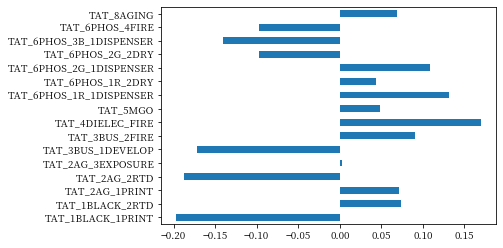

In [81]:
df_log_scaled_coef.plot.barh(y="Coef",legend=False)